In [84]:
tstv<-read.table("~/working/project_VCF/tstv/ukb23156_tstv.txt")

In [85]:
head(tstv)

,V1,V2
,<chr>,<dbl>
1,ukb23156_c10_b0_v1.leftnorm.filtered.stats_bcftools,2.10
2,ukb23156_c10_b0_v1.leftnorm.filtered.stats_bcftools.known,2.23
3,ukb23156_c10_b0_v1.leftnorm.filtered.stats_bcftools.novel,1.83
4,ukb23156_c10_b0_v1.leftnorm.filtered.tstv,2.10
5,ukb23156_c10_b0_v1.leftnorm.stats_bcftools.known,2.22
6,ukb23156_c10_b0_v1.leftnorm.stats_bcftools.maf,2.10


In [86]:
chrlist<-strsplit(tstv[1:5,1],"_")

In [87]:
chr<-blo<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
}

In [88]:
data<-as.data.frame(cbind(t(chr),t(blo)))
colnames(data)<-c("Chr","Block")

In [24]:
data

Chr,Block
<chr>,<chr>
c10,b0
c10,b0
c10,b0
c10,b0
c10,b0


In [89]:
chrlist<-strsplit(tstv[,1],"_")
chr<-blo<-file<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
    file<-cbind(file,paste0(chrlist[[i]][4],"_",chrlist[[i]][5]))
}
data<-as.data.frame(cbind(t(chr),t(blo),t(file)))
colnames(data)<-c("Chr","Block","File")

In [90]:
data$TSTV<-tstv[,2]

In [40]:
head(data)

,Chr,Block,File,TSTV
,<chr>,<chr>,<chr>,<dbl>
1,c10,b0,v1.leftnorm.filtered.stats_bcftools,2.10
2,c10,b0,v1.leftnorm.filtered.stats_bcftools.known,2.23
3,c10,b0,v1.leftnorm.filtered.stats_bcftools.novel,1.83
4,c10,b0,v1.leftnorm.filtered.tstv_NA,2.10
5,c10,b0,v1.leftnorm.stats_bcftools.known,2.22
6,c10,b0,v1.leftnorm.stats_bcftools.maf,2.10


In [91]:
data[,1]<-gsub("c", "", data[,1])
table(data[,1])


  1  10  11  12  13  14  15  16  17  18  19   2  20  21  22   3   4   5   6   7 
873 360 513 468 162 270 306 423 504 144 585 639 225  99 207 504 351 387 432 423 
  8   9   X   Y 
315 378 216   9 

In [92]:
table(data[,3])


      v1.leftnorm.filtered.stats_bcftools 
                                      977 
v1.leftnorm.filtered.stats_bcftools.known 
                                      977 
v1.leftnorm.filtered.stats_bcftools.novel 
                                      977 
             v1.leftnorm.filtered.tstv_NA 
                                      977 
         v1.leftnorm.stats_bcftools.known 
                                      977 
           v1.leftnorm.stats_bcftools.maf 
                                      977 
         v1.leftnorm.stats_bcftools.novel 
                                      977 
                        v1.stats_bcftools 
                                      977 
                    v1.unfiltered.tstv_NA 
                                      977 

In [44]:
Avetstv<-matrix(nrow=9,ncol=24)
colnames(Avetstv)<-names(table(data[,1]))
rownames(Avetstv)<-names(table(data[,3]))
for (i in names(table(data[,3]))){
    for (j in names(table(data[,1]))){
        Avetstv[i,j]<-mean(data[(data$Chr==j)&(data$File==i),"TSTV"])
    }
}
colnames(Avetstv)<-names(table(data[,1]))

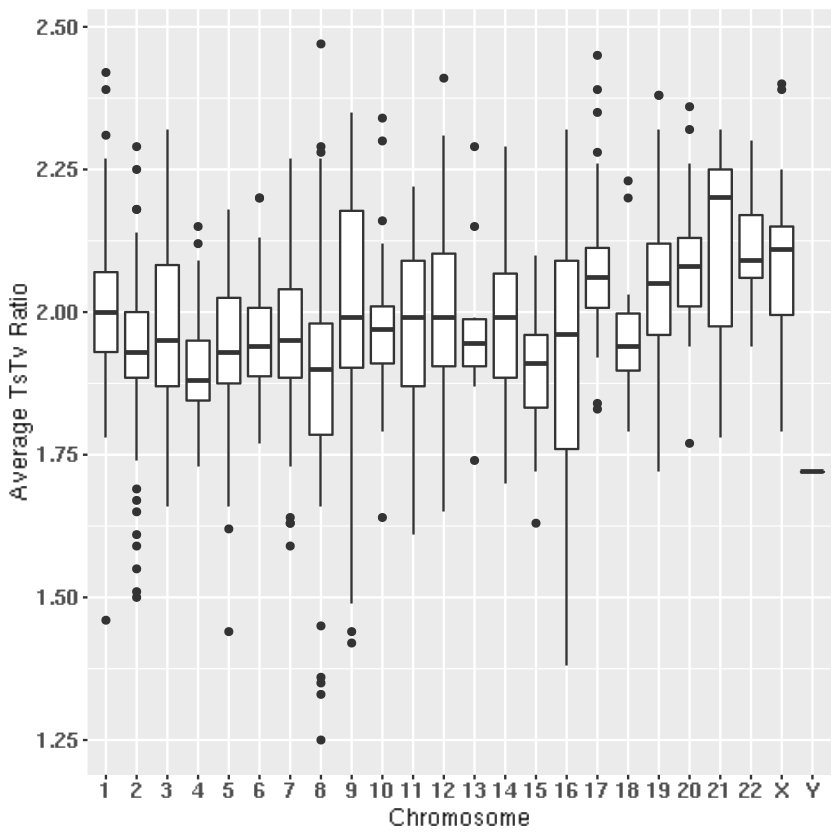

In [95]:
library(ggplot2)
order<-c(
"1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22","X","Y")
data$Chr<-factor(data$Chr,levels=order)
p <- ggplot(data[data$File=="v1.unfiltered.tstv_NA",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    theme(text = element_text(size=14), axis.text=element_text(size=12,face = "bold"))
p

In [100]:
png("~/working/project_VCF/tstv/ukb23156.leftnorm.filtered.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.leftnorm.filtered.stats_bcftools",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of leftnorm filtered SNPs by bcftools")+
    theme(text = element_text(size=20))
dev.off()
png("~/working/project_VCF/tstv/ukb23156.leftnorm.filtered.known.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.leftnorm.filtered.stats_bcftools.known",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of leftnorm filtered known SNPs by bcftools")+
    theme(text = element_text(size=20))
dev.off()
png("~/working/project_VCF/tstv/ukb23156.leftnorm.filtered.novel.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.leftnorm.filtered.stats_bcftools.novel",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of leftnorm filtered novel SNPs by bcftools")+
    theme(text = element_text(size=20))
dev.off()
png("~/working/project_VCF/tstv/ukb23156.leftnorm.filtered2.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.leftnorm.filtered.tstv_NA",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of leftnorm filtered SNPs by bcftools")+
    theme(text = element_text(size=20))
dev.off()
png("~/working/project_VCF/tstv/ukb23156.leftnorm.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.leftnorm.stats_bcftools.maf",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of leftnorm SNPs by bcftools")+
    theme(text = element_text(size=20))
dev.off()
png("~/working/project_VCF/tstv/ukb23156.leftnorm.known.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.leftnorm.stats_bcftools.known",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of leftnorm known SNPs by bcftools")+
    theme(text = element_text(size=20))
dev.off()
png("~/working/project_VCF/tstv/ukb23156.leftnorm.novel.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.leftnorm.stats_bcftools.novel",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of leftnorm novel SNPs by bcftools")+
    theme(text = element_text(size=20))
dev.off()
png("~/working/project_VCF/tstv/ukb23156.unfiltered.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.stats_bcftools",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of unfiltered SNPs by bcftools")+
    theme(text = element_text(size=20))
dev.off()
png("~/working/project_VCF/tstv/ukb23156.unfiltered2.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.unfiltered.tstv_NA",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of unfiltered SNPs by bcftools")+
    theme(text = element_text(size=20))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [22]:
Avetstv

,1,10,11,12,13,14,15,16,17,18,⋯,22,3,4,5,6,7,8,9,X,Y
v1.leftnorm.filtered.stats,1.970344,1.942000,1.950409,1.968718,1.924444,1.956889,1.874314,1.876312,2.032619,1.925625,⋯,2.066812,1.930119,1.877778,1.900388,1.928542,1.914113,1.846667,1.941984,1.390278,1.160000
v1.leftnorm.filtered.tstv,1.996701,1.966250,1.977895,1.993654,1.948889,1.981667,1.898235,1.912553,2.065714,1.948125,⋯,2.110000,1.952679,1.898462,1.919302,1.949792,1.938723,1.868286,1.972143,2.085417,1.740000
v1.leftnorm.stats,1.969381,1.940667,1.949474,1.967436,1.924074,1.955333,1.873431,1.875461,2.031369,1.925833,⋯,2.064783,1.929226,1.876752,1.898682,1.927292,1.912695,1.845714,1.941111,1.383611,1.146667
v1.stats,2.004021,1.972000,1.985965,2.001154,1.957222,1.990000,1.903824,1.919574,2.074464,1.958125,⋯,2.118696,1.961071,1.905128,1.926512,1.956667,1.946596,1.874571,1.980238,2.084167,1.720000
v1.unfiltered.tstv,2.004021,1.972000,1.985965,2.001154,1.957222,1.990000,1.903824,1.919574,2.074464,1.958125,⋯,2.118696,1.961071,1.905128,1.926512,1.956667,1.946596,1.874571,1.980238,2.084167,1.720000


In [101]:
sift<-read.table("~/working/project_VCF/tstv/ukb23156_snpsift_tstv.txt")

In [50]:
head(sift)

,V1,V2
,<chr>,<dbl>
1,ukb23156_c10_b0_v1.leftnorm.filtered.stats_snpsift,3.758
2,ukb23156_c10_b0_v1.leftnorm.stats_snpsift,3.752
3,ukb23156_c10_b0_v1.stats_snpsift,5.348
4,ukb23156_c10_b10_v1.leftnorm.filtered.stats_snpsift,2.226
5,ukb23156_c10_b10_v1.leftnorm.stats_snpsift,2.272
6,ukb23156_c10_b10_v1.stats_snpsift,3.041


In [102]:
chrlist<-strsplit(sift[,1],"_")
chr<-blo<-file<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
    file<-cbind(file,paste0(chrlist[[i]][4],"_",chrlist[[i]][5]))
}
data<-as.data.frame(cbind(t(chr),t(blo),t(file)))
colnames(data)<-c("Chr","Block","File")
data$TSTV<-sift[,2]
data[,1]<-gsub("c", "", data[,1])
table(data[,1])


  1  10  11  12  13  14  15  16  17  18  19   2  20  21  22   3   4   5   6   7 
291 120 171 156  54  90 102 141 168  48 195 213  75  33  69 168 117 129 144 141 
  8   9   X   Y 
105 126  72   3 

In [55]:
head(data)

,Chr,Block,File,TSTV
,<chr>,<chr>,<chr>,<dbl>
1,10,b0,v1.leftnorm.filtered.stats_snpsift,3.758
2,10,b0,v1.leftnorm.stats_snpsift,3.752
3,10,b0,v1.stats_snpsift,5.348
4,10,b10,v1.leftnorm.filtered.stats_snpsift,2.226
5,10,b10,v1.leftnorm.stats_snpsift,2.272
6,10,b10,v1.stats_snpsift,3.041


In [56]:
table(data[,3])


v1.leftnorm.filtered.stats_snpsift          v1.leftnorm.stats_snpsift 
                               977                                977 
                  v1.stats_snpsift 
                               977 

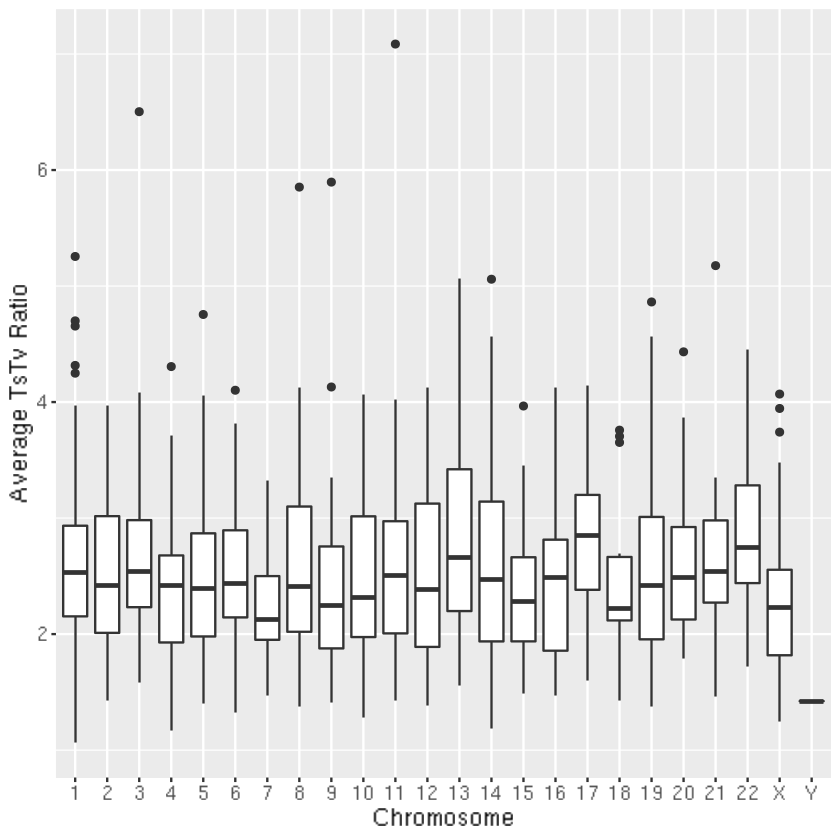

In [103]:
library(ggplot2)
order<-c(
"1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22","X","Y")
data$Chr<-factor(data$Chr,levels=order)
p <- ggplot(data[data$File=="v1.leftnorm.filtered.stats_snpsift",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    theme(text = element_text(size=14))
p

In [104]:
png("~/working/project_VCF/tstv/ukb23156.leftnorm.filtered.snpsift.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.leftnorm.filtered.stats_snpsift",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of leftnorm filtered SNPs by snpsift")+
    theme(text = element_text(size=20))
dev.off()
png("~/working/project_VCF/tstv/ukb23156.leftnorm.snpsift.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.leftnorm.stats_snpsift",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of leftnorm filtered SNPs by snpsift")+
    theme(text = element_text(size=20))
dev.off()
png("~/working/project_VCF/tstv/ukb23156.unfiltered.snpsift.ave_block.tstv.boxplot.png",width = 1000, height = 1000)
ggplot(data[data$File=="v1.stats_snpsift",], aes(x=Chr, y=TSTV)) +  
    geom_boxplot()+
    xlab("Chromosome")+
    ylab("Average TsTv Ratio")+
    ggtitle("Average TsTv Ratio of unfiltered SNPs by snpsift")+
    theme(text = element_text(size=20))
dev.off()

png 
  2

png 
  2

png 
  2

In [1]:
bcf<-read.table("~/working/project_VCF/tstv/bcf.txt")

In [2]:
dim(bcf)

[1] 200643      1

In [10]:
summary(bcf)

       V1       
 Min.   : 21.0  
 1st Qu.: 56.0  
 Median : 61.0  
 Mean   : 61.5  
 3rd Qu.: 66.0  
 Max.   :111.0  

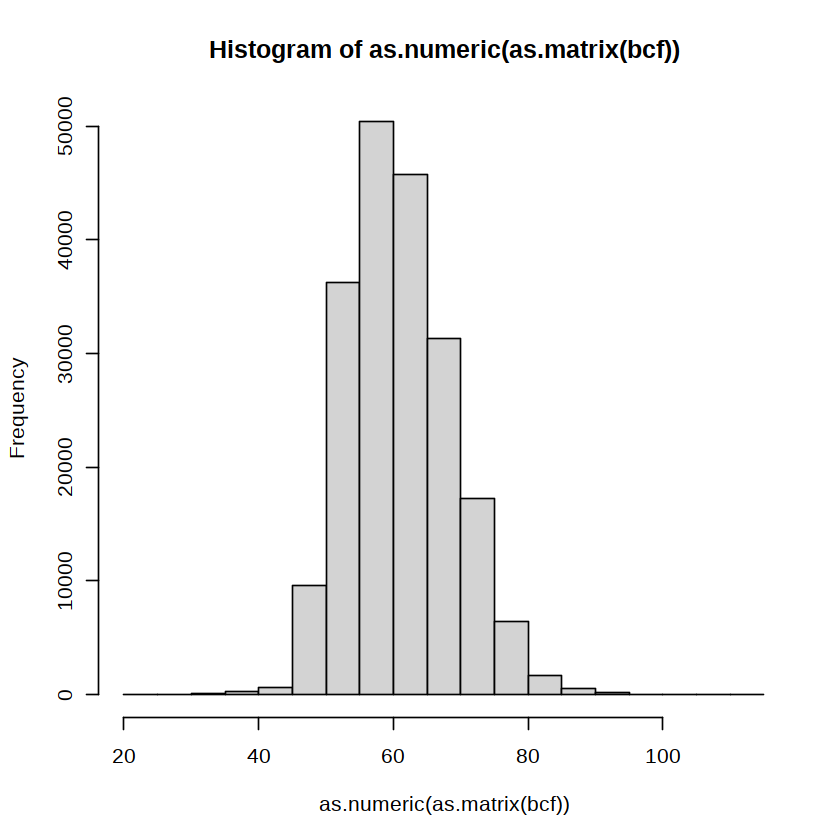

In [29]:
hist(as.numeric(as.matrix(bcf)))

In [3]:
snift<-as.numeric(read.table("~/working/project_VCF/tstv/snift.txt")[-1,])
snift<-snift[-length(snift)]

In [5]:
length(snift)

[1] 200643

In [22]:
summary(snift)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  37.00   86.00   92.00   91.05   97.00  137.00 

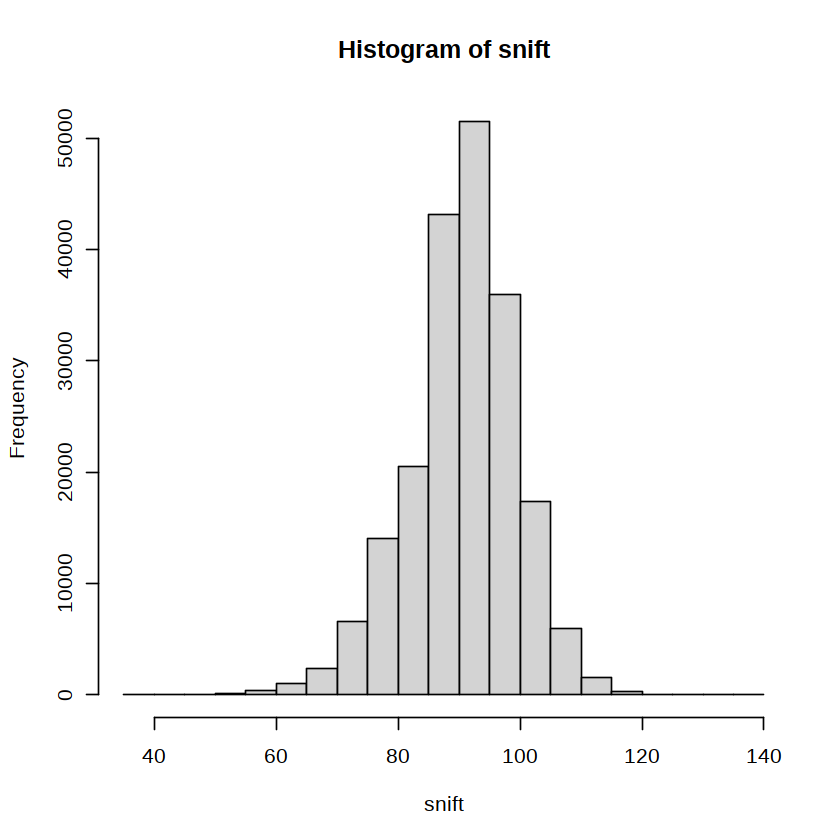

In [30]:
hist(snift)

In [105]:
ts<-read.table("~/working/project_VCF/tstv/ukb23156_bcftools_ts3.txt")
head(ts)

,V1,V2
,<chr>,<int>
1,ukb23156_c10_b0_v1.leftnorm.filtered.stats_bcftools,17164715
2,ukb23156_c10_b0_v1.leftnorm.stats_bcftools.maf,18005478
3,ukb23156_c10_b0_v1.stats_bcftools,17377468
4,ukb23156_c10_b10_v1.leftnorm.filtered.stats_bcftools,9227964
5,ukb23156_c10_b10_v1.leftnorm.stats_bcftools.maf,9960780
6,ukb23156_c10_b10_v1.stats_bcftools,9555127


In [106]:
chrlist<-strsplit(ts[,1],"_")
chr<-blo<-file<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
    file<-cbind(file,paste0(chrlist[[i]][4],"_",chrlist[[i]][5]))
}
data<-as.data.frame(cbind(t(chr),t(blo),t(file)))
colnames(data)<-c("Chr","Block","File")
data$TS<-ts[,2]
data[,1]<-gsub("c", "", data[,1])

In [20]:
head(data)

,Chr,Block,File,TS
,<chr>,<chr>,<chr>,<int>
1,10,b0,v1.leftnorm.filtered.stats_bcftools,17164715
2,10,b0,v1.leftnorm.stats_bcftools.maf,18005478
3,10,b0,v1.stats_bcftools,17377468
4,10,b10,v1.leftnorm.filtered.stats_bcftools,9227964
5,10,b10,v1.leftnorm.stats_bcftools.maf,9960780
6,10,b10,v1.stats_bcftools,9555127


In [21]:
table(data[,3])


v1.leftnorm.filtered.stats_bcftools      v1.leftnorm.stats_bcftools.maf 
                                977                                 977 
                  v1.stats_bcftools 
                                977 

In [107]:
tv<-read.table("~/working/project_VCF/tstv/ukb23156_bcftools_tv3.txt")
chrlist<-strsplit(tv[,1],"_")
chr<-blo<-file<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
    file<-cbind(file,paste0(chrlist[[i]][4],"_",chrlist[[i]][5]))
}
data2<-as.data.frame(cbind(t(chr),t(blo),t(file)))
colnames(data2)<-c("Chr","Block","File")
data2$TV<-tv[,2]
data2[,1]<-gsub("c", "", data2[,1])

In [24]:
head(tv)

,V1,V2
,<chr>,<int>
1,ukb23156_c10_b0_v1.leftnorm.filtered.stats_bcftools,4977193
2,ukb23156_c10_b0_v1.leftnorm.stats_bcftools.maf,5221389
3,ukb23156_c10_b0_v1.stats_bcftools,5795834
4,ukb23156_c10_b10_v1.leftnorm.filtered.stats_bcftools,3871971
5,ukb23156_c10_b10_v1.leftnorm.stats_bcftools.maf,4137115
6,ukb23156_c10_b10_v1.stats_bcftools,4534912


In [108]:
table(data2[,3])


v1.leftnorm.filtered.stats_bcftools      v1.leftnorm.stats_bcftools.maf 
                                977                                 977 
                  v1.stats_bcftools 
                                977 

In [113]:
cbind(data,data2)[1:10,]

,Chr,Block,File,TS,TV,Chr,Block,File,TV
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,10,b0,v1.leftnorm.filtered.stats_bcftools,17164715,4977193,10,b0,v1.leftnorm.filtered.stats_bcftools,4977193
2,10,b0,v1.leftnorm.stats_bcftools.maf,18005478,5221389,10,b0,v1.leftnorm.stats_bcftools.maf,5221389
3,10,b0,v1.stats_bcftools,17377468,5795834,10,b0,v1.stats_bcftools,5795834
4,10,b10,v1.leftnorm.filtered.stats_bcftools,9227964,3871971,10,b10,v1.leftnorm.filtered.stats_bcftools,3871971
5,10,b10,v1.leftnorm.stats_bcftools.maf,9960780,4137115,10,b10,v1.leftnorm.stats_bcftools.maf,4137115
6,10,b10,v1.stats_bcftools,9555127,4534912,10,b10,v1.stats_bcftools,4534912
7,10,b11,v1.leftnorm.filtered.stats_bcftools,12519147,4443762,10,b11,v1.leftnorm.filtered.stats_bcftools,4443762
8,10,b11,v1.leftnorm.stats_bcftools.maf,13321176,4861454,10,b11,v1.leftnorm.stats_bcftools.maf,4861454
9,10,b11,v1.stats_bcftools,13121820,5060644,10,b11,v1.stats_bcftools,5060644


In [109]:
data$TV<-data2$TV

In [110]:
f="v1.stats_bcftools"
tssum<-tvsum<-c()
for (i in names(table(data$Chr))){
    tssum<-c(tssum,sum(data[(data$Chr==i) & (data$File==f),"TS"]))
    tvsum<-c(tvsum,sum(data[(data$Chr==i) & (data$File==f),"TV"]))
}
tstv<-tssum/tvsum
tstv<-cbind(tstv,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)

In [111]:
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp

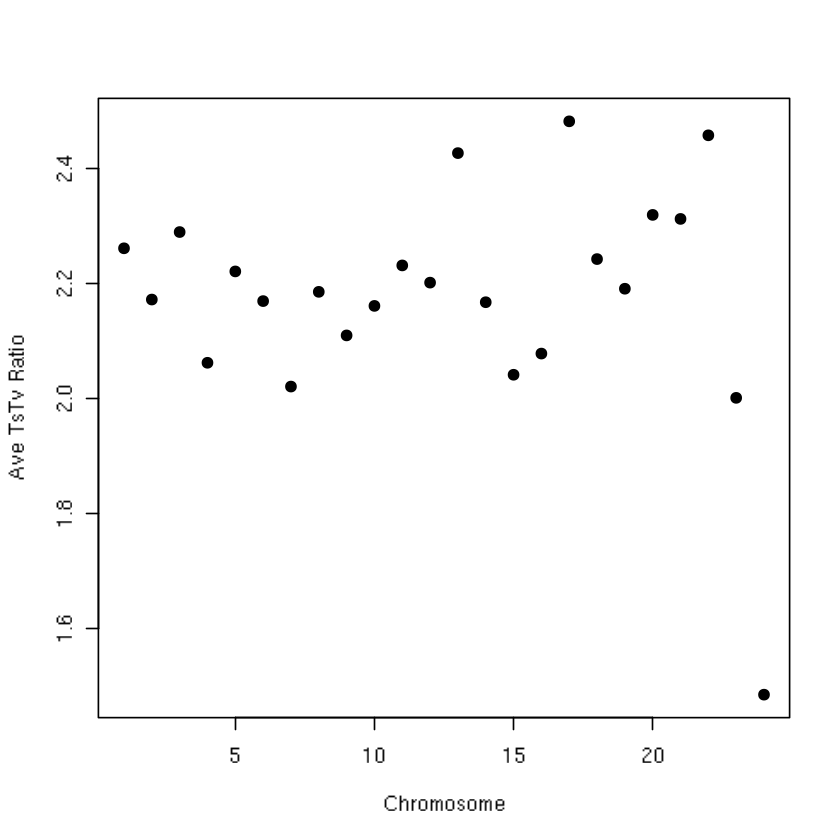

In [112]:
plot(tstv$tstv,ylab="Ave TsTv Ratio", xlab="Chromosome",pch=19)

In [106]:
png("~/working/project_VCF/tstv/ukb23156.ave_chromosome.tstv.scatterplot.png",width = 1000, height = 500)
plot(tstv$tstv,ylab="Ave TsTv Ratio", xlab="Chromosome",pch=19,cex.lab=1.5,cex.axis=1.5,cex=1.5,xaxt="n")
axis(1,tstv$chr,at=1:24)
dev.off()

png 
  2

In [ ]:
ts<-read.table("~/working/project_VCF/tstv/ukb23156_bcftools_ts3.txt")
chrlist<-strsplit(ts[,1],"_")
chr<-blo<-file<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
    file<-cbind(file,paste0(chrlist[[i]][4],"_",chrlist[[i]][5]))
}
data<-as.data.frame(cbind(t(chr),t(blo),t(file)))
colnames(data)<-c("Chr","Block","File")
data$TS<-ts[,2]
data[,1]<-gsub("c", "", data[,1])
tv<-read.table("~/working/project_VCF/tstv/ukb23156_bcftools_tv3.txt")
chrlist<-strsplit(tv[,1],"_")
chr<-blo<-file<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
    file<-cbind(file,paste0(chrlist[[i]][4],"_",chrlist[[i]][5]))
}
data2<-as.data.frame(cbind(t(chr),t(blo),t(file)))
colnames(data2)<-c("Chr","Block","File")
data2$TV<-tv[,2]
data2[,1]<-gsub("c", "", data2[,1])
data$TV<-data2$TV

In [107]:
f="v1.leftnorm.stats_bcftools.maf"
tssum<-tvsum<-c()
for (i in names(table(data$Chr))){
    tssum<-c(tssum,sum(data[(data$Chr==i) & (data$File==f),"TS"]))
    tvsum<-c(tvsum,sum(data[(data$Chr==i) & (data$File==f),"TV"]))
}
tstv<-tssum/tvsum
tstv<-cbind(tstv,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp
png("~/working/project_VCF/tstv/ukb23156.leftnorm.ave_chromosome.tstv.scatterplot.png",width = 1000, height = 500)
plot(tstv$tstv,ylab="Ave TsTv Ratio", xlab="Chromosome",pch=19,cex.lab=1.5,cex.axis=1.5,cex=1.5,xaxt="n")
axis(1,tstv$chr,at=1:24)
dev.off()

png 
  2

In [108]:
f="v1.leftnorm.filtered.stats_bcftools"
tssum<-tvsum<-c()
for (i in names(table(data$Chr))){
    tssum<-c(tssum,sum(data[(data$Chr==i) & (data$File==f),"TS"]))
    tvsum<-c(tvsum,sum(data[(data$Chr==i) & (data$File==f),"TV"]))
}
tstv<-tssum/tvsum
tstv<-cbind(tstv,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp
png("~/working/project_VCF/tstv/ukb23156.leftnorm.filtered.ave_chromosome.tstv.scatterplot.png",width = 1000, height = 500)
plot(tstv$tstv,ylab="Ave TsTv Ratio", xlab="Chromosome",pch=19,cex.lab=1.5,cex.axis=1.5,cex=1.5,xaxt="n")
axis(1,tstv$chr,at=1:24)
dev.off()

png 
  2

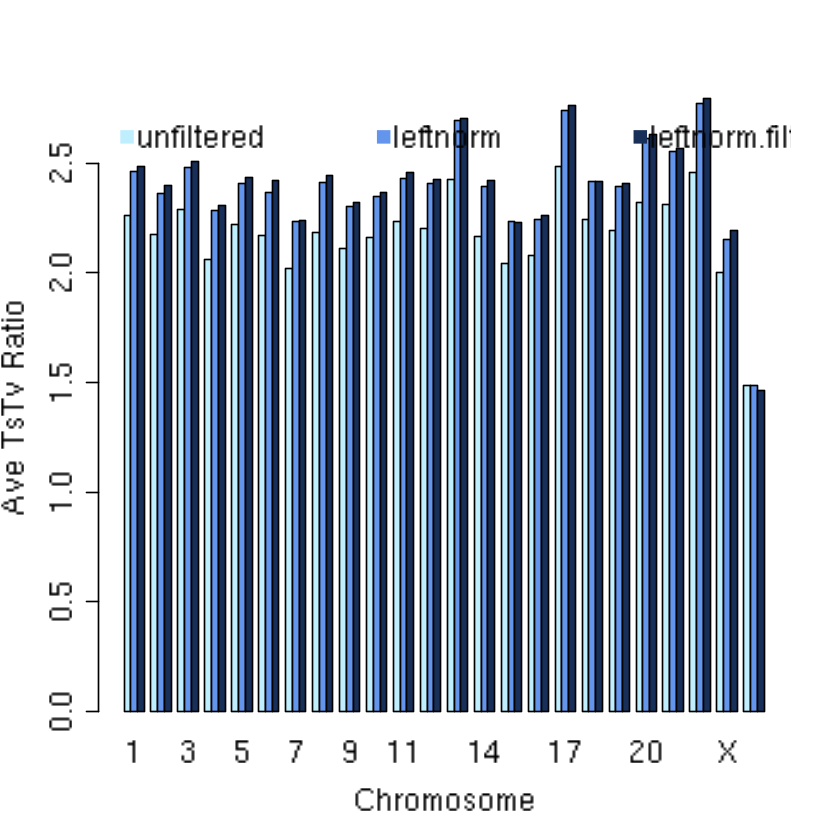

In [132]:
rep=function(data,f){
    tssum<-tvsum<-c()
    for (i in names(table(data$Chr))){
        tssum<-c(tssum,sum(data[(data$Chr==i) & (data$File==f),"TS"]))
        tvsum<-c(tvsum,sum(data[(data$Chr==i) & (data$File==f),"TV"]))
    }
    tstv<-tssum/tvsum
    tstv<-cbind(tstv,chr=names(table(data$Chr)))
    tstv<-as.data.frame(tstv)
    tmp<-tstv[1:22,]
    tmp<-tmp[order(as.numeric(tmp$chr)),]
    tstv[1:22,]<-tmp
    tstv$tstv<-as.numeric(tstv$tstv)
    return(tstv)
}
data1=rep(data,"v1.stats_bcftools")
data2=rep(data,"v1.leftnorm.stats_bcftools.maf")
data3=rep(data,"v1.leftnorm.filtered.stats_bcftools")
barplot(rbind(data1$tstv,data2$tstv,data3$tstv),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue1", "cornflowerblue","#183059"),names.arg=tstv$chr)
legend("topleft", c("unfiltered","leftnorm","leftnorm.filtered"), pch=15, col=c("lightblue1", "cornflowerblue","#183059"), bty="n",horiz =TRUE,cex=1.5,x.intersp =0.4)

In [134]:
png("~/working/project_VCF/tstv/ukb23156.leftnorm-filtered-comparison.ave_chromosome.tstv.barplot.png",width = 1000, height = 500)
barplot(rbind(data1$tstv,data2$tstv,data3$tstv),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue1", "cornflowerblue","#183059"),names.arg=tstv$chr)
legend("topleft", c("unfiltered","leftnorm","leftnorm.filtered"), pch=15, col=c("lightblue1", "cornflowerblue","#183059"), bty="n",horiz =TRUE,cex=1.5,x.intersp =0.4)
dev.off()

png 
  2

In [4]:
data<-read.table("~/working/project_VCF/tstv/ukb23156_bcftools_maf_tstv2.txt")

In [5]:
head(data)

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<int>,<int>
1,ukb23156_c10_b0_v1.leftnorm.filtered.stats_bcftools,10007,5071,1703,500
2,ukb23156_c10_b0_v1.leftnorm.filtered.stats_bcftools.known,6879,3361,1692,491
3,ukb23156_c10_b0_v1.leftnorm.filtered.stats_bcftools.novel,3128,1710,11,9
4,ukb23156_c10_b0_v1.leftnorm.stats_bcftools.known,6953,3391,1623,468
5,ukb23156_c10_b0_v1.leftnorm.stats_bcftools.maf,10088,5103,1632,477
6,ukb23156_c10_b0_v1.leftnorm.stats_bcftools.novel,3135,1712,9,9


In [8]:
chrlist<-strsplit(data[,1],"_")
chr<-blo<-file<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
    file<-cbind(file,paste0(chrlist[[i]][4],"_",chrlist[[i]][5]))
}
data2<-as.data.frame(cbind(t(chr),t(blo),t(file)))
colnames(data2)<-c("Chr","Block","File")
data2[,1]<-gsub("c", "", data2[,1])

In [10]:
data<-data[,-1]
data<-cbind(data2,data)

In [12]:
head(data)

,Chr,Block,File,V2,V3,V4,V5
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,10,b0,v1.leftnorm.filtered.stats_bcftools,10007,5071,1703,500
2,10,b0,v1.leftnorm.filtered.stats_bcftools.known,6879,3361,1692,491
3,10,b0,v1.leftnorm.filtered.stats_bcftools.novel,3128,1710,11,9
4,10,b0,v1.leftnorm.stats_bcftools.known,6953,3391,1623,468
5,10,b0,v1.leftnorm.stats_bcftools.maf,10088,5103,1632,477
6,10,b0,v1.leftnorm.stats_bcftools.novel,3135,1712,9,9


In [15]:
table(data$File)


      v1.leftnorm.filtered.stats_bcftools 
                                      977 
v1.leftnorm.filtered.stats_bcftools.known 
                                      952 
v1.leftnorm.filtered.stats_bcftools.novel 
                                      977 
         v1.leftnorm.stats_bcftools.known 
                                      952 
           v1.leftnorm.stats_bcftools.maf 
                                      977 
         v1.leftnorm.stats_bcftools.novel 
                                      977 
                        v1.stats_bcftools 
                                      977 

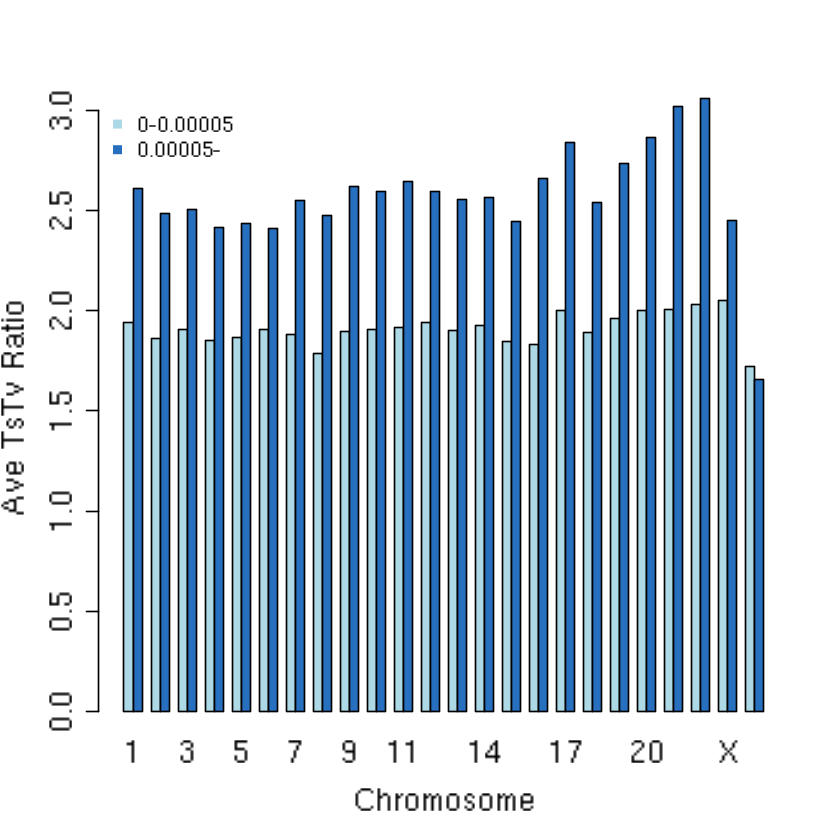

In [75]:
f="v1.stats_bcftools"
tssum1<-tvsum1<-tssum2<-tvsum2<-c()
for (i in names(table(data$Chr))){
    tssum1<-c(tssum1,sum(data[(data$Chr==i) & (data$File==f),"V2"]))
    tvsum1<-c(tvsum1,sum(data[(data$Chr==i) & (data$File==f),"V3"]))
    tssum2<-c(tssum2,sum(data[(data$Chr==i) & (data$File==f),"V4"]))
    tvsum2<-c(tvsum2,sum(data[(data$Chr==i) & (data$File==f),"V5"]))    
}
tstv1<-tssum1/tvsum1
tstv2<-tssum2/tvsum2
tstv<-cbind(tstv1,tstv2,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp
barplot(rbind(as.numeric(tstv[,1]),as.numeric(tstv[,2])),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue", "#276FBF"),names.arg=tstv$chr)
legend("topleft", c("0-0.00005","0.00005-"), pch=15, col=c("lightblue", "#276FBF"), bty="n")

In [73]:
png("~/working/project_VCF/tstv/ukb23156.ave_chromosome.maf.tstv.barplot.png",width = 1000, height = 500)
barplot(rbind(as.numeric(tstv[,1]),as.numeric(tstv[,2])),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue", "#276FBF"),names.arg=tstv$chr)
legend("topleft", c("0-0.00005","0.00005-"), pch=15, col=c("lightblue", "#276FBF"), bty="n")
dev.off()

png 
  2

In [76]:
f="v1.leftnorm.stats_bcftools.maf"
tssum1<-tvsum1<-tssum2<-tvsum2<-c()
for (i in names(table(data$Chr))){
    tssum1<-c(tssum1,sum(data[(data$Chr==i) & (data$File==f),"V2"]))
    tvsum1<-c(tvsum1,sum(data[(data$Chr==i) & (data$File==f),"V3"]))
    tssum2<-c(tssum2,sum(data[(data$Chr==i) & (data$File==f),"V4"]))
    tvsum2<-c(tvsum2,sum(data[(data$Chr==i) & (data$File==f),"V5"]))    
}
tstv1<-tssum1/tvsum1
tstv2<-tssum2/tvsum2
tstv<-cbind(tstv1,tstv2,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp
png("~/working/project_VCF/tstv/ukb23156.leftnorm.ave_chromosome.maf.tstv.barplot.png",width = 1000, height = 500)
barplot(rbind(as.numeric(tstv[,1]),as.numeric(tstv[,2])),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue", "#276FBF"),names.arg=tstv$chr)
legend("topleft", c("0-0.00005","0.00005-"), pch=15, col=c("lightblue", "#276FBF"), bty="n")
dev.off()

png 
  2

In [77]:
f="v1.leftnorm.stats_bcftools.novel"
tssum1<-tvsum1<-tssum2<-tvsum2<-c()
for (i in names(table(data$Chr))){
    tssum1<-c(tssum1,sum(data[(data$Chr==i) & (data$File==f),"V2"]))
    tvsum1<-c(tvsum1,sum(data[(data$Chr==i) & (data$File==f),"V3"]))
    tssum2<-c(tssum2,sum(data[(data$Chr==i) & (data$File==f),"V4"]))
    tvsum2<-c(tvsum2,sum(data[(data$Chr==i) & (data$File==f),"V5"]))    
}
tstv1<-tssum1/tvsum1
tstv2<-tssum2/tvsum2
tstv<-cbind(tstv1,tstv2,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp
png("~/working/project_VCF/tstv/ukb23156.leftnorm.novel.ave_chromosome.maf.tstv.barplot.png",width = 1000, height = 500)
barplot(rbind(as.numeric(tstv[,1]),as.numeric(tstv[,2])),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue", "#276FBF"),names.arg=tstv$chr)
legend("topleft", c("0-0.00005","0.00005-"), pch=15, col=c("lightblue", "#276FBF"), bty="n")
dev.off()

png 
  2

In [82]:
f="v1.leftnorm.stats_bcftools.known"
tssum1<-tvsum1<-tssum2<-tvsum2<-c()
for (i in names(table(data$Chr))){
    tssum1<-c(tssum1,sum(data[(data$Chr==i) & (data$File==f),"V2"]))
    tvsum1<-c(tvsum1,sum(data[(data$Chr==i) & (data$File==f),"V3"]))
    tssum2<-c(tssum2,sum(data[(data$Chr==i) & (data$File==f),"V4"]))
    tvsum2<-c(tvsum2,sum(data[(data$Chr==i) & (data$File==f),"V5"]))    
}
tstv1<-tssum1/tvsum1
tstv2<-tssum2/tvsum2
tstv<-cbind(tstv1,tstv2,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp
png("~/working/project_VCF/tstv/ukb23156.leftnorm.known.ave_chromosome.maf.tstv.barplot.png",width = 1000, height = 500)
barplot(rbind(as.numeric(tstv[,1]),as.numeric(tstv[,2])),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue", "#276FBF"),names.arg=tstv$chr)
legend("topleft", c("0-0.00005","0.00005-"), pch=15, col=c("lightblue", "#276FBF"), bty="n")
dev.off()

png 
  2

In [83]:
f="v1.leftnorm.filtered.stats_bcftools"
tssum1<-tvsum1<-tssum2<-tvsum2<-c()
for (i in names(table(data$Chr))){
    tssum1<-c(tssum1,sum(data[(data$Chr==i) & (data$File==f),"V2"]))
    tvsum1<-c(tvsum1,sum(data[(data$Chr==i) & (data$File==f),"V3"]))
    tssum2<-c(tssum2,sum(data[(data$Chr==i) & (data$File==f),"V4"]))
    tvsum2<-c(tvsum2,sum(data[(data$Chr==i) & (data$File==f),"V5"]))    
}
tstv1<-tssum1/tvsum1
tstv2<-tssum2/tvsum2
tstv<-cbind(tstv1,tstv2,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp
png("~/working/project_VCF/tstv/ukb23156.leftnorm.filtered.ave_chromosome.maf.tstv.barplot.png",width = 1000, height = 500)
barplot(rbind(as.numeric(tstv[,1]),as.numeric(tstv[,2])),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue", "#276FBF"),names.arg=tstv$chr)
legend("topleft", c("0-0.00005","0.00005-"), pch=15, col=c("lightblue", "#276FBF"), bty="n")
dev.off()
f="v1.leftnorm.filtered.stats_bcftools.novel"
tssum1<-tvsum1<-tssum2<-tvsum2<-c()
for (i in names(table(data$Chr))){
    tssum1<-c(tssum1,sum(data[(data$Chr==i) & (data$File==f),"V2"]))
    tvsum1<-c(tvsum1,sum(data[(data$Chr==i) & (data$File==f),"V3"]))
    tssum2<-c(tssum2,sum(data[(data$Chr==i) & (data$File==f),"V4"]))
    tvsum2<-c(tvsum2,sum(data[(data$Chr==i) & (data$File==f),"V5"]))    
}
tstv1<-tssum1/tvsum1
tstv2<-tssum2/tvsum2
tstv<-cbind(tstv1,tstv2,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp
png("~/working/project_VCF/tstv/ukb23156.leftnorm.filtered.novel.ave_chromosome.maf.tstv.barplot.png",width = 1000, height = 500)
barplot(rbind(as.numeric(tstv[,1]),as.numeric(tstv[,2])),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue", "#276FBF"),names.arg=tstv$chr)
legend("topleft", c("0-0.00005","0.00005-"), pch=15, col=c("lightblue", "#276FBF"), bty="n")
dev.off()
f="v1.leftnorm.filtered.stats_bcftools.known"
tssum1<-tvsum1<-tssum2<-tvsum2<-c()
for (i in names(table(data$Chr))){
    tssum1<-c(tssum1,sum(data[(data$Chr==i) & (data$File==f),"V2"]))
    tvsum1<-c(tvsum1,sum(data[(data$Chr==i) & (data$File==f),"V3"]))
    tssum2<-c(tssum2,sum(data[(data$Chr==i) & (data$File==f),"V4"]))
    tvsum2<-c(tvsum2,sum(data[(data$Chr==i) & (data$File==f),"V5"]))    
}
tstv1<-tssum1/tvsum1
tstv2<-tssum2/tvsum2
tstv<-cbind(tstv1,tstv2,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp
png("~/working/project_VCF/tstv/ukb23156.leftnorm.filtered.known.ave_chromosome.maf.tstv.barplot.png",width = 1000, height = 500)
barplot(rbind(as.numeric(tstv[,1]),as.numeric(tstv[,2])),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue", "#276FBF"),names.arg=tstv$chr)
legend("topleft", c("0-0.00005","0.00005-"), pch=15, col=c("lightblue", "#276FBF"), bty="n")
dev.off()

png 
  2

png 
  2

png 
  2

In [1]:
ts<-read.table("~/working/project_VCF/tstv/ukb23156_snpsift_ts.txt")
chrlist<-strsplit(ts[,1],"_")
chr<-blo<-file<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
    file<-cbind(file,paste0(chrlist[[i]][4],"_",chrlist[[i]][5]))
}
data<-as.data.frame(cbind(t(chr),t(blo),t(file)))
colnames(data)<-c("Chr","Block","File")
data$TS<-ts[,2]
data[,1]<-gsub("c", "", data[,1])
tv<-read.table("~/working/project_VCF/tstv/ukb23156_snpsift_tv.txt")
chrlist<-strsplit(tv[,1],"_")
chr<-blo<-file<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
    file<-cbind(file,paste0(chrlist[[i]][4],"_",chrlist[[i]][5]))
}
data2<-as.data.frame(cbind(t(chr),t(blo),t(file)))
colnames(data2)<-c("Chr","Block","File")
data2$TV<-tv[,2]
data2[,1]<-gsub("c", "", data2[,1])
data$TV<-data2$TV
head(data)

,Chr,Block,File,TS,TV
,<chr>,<chr>,<chr>,<int>,<int>
1,10,b0,v1.leftnorm.filtered.stats_snpsift,25230047,6713515
2,10,b0,v1.leftnorm.stats_snpsift,26831650,7151401
3,10,b0,v1.stats_snpsift,22454161,4198958
4,10,b10,v1.leftnorm.filtered.stats_snpsift,11603045,5211927
5,10,b10,v1.leftnorm.stats_snpsift,12686326,5584881
6,10,b10,v1.stats_snpsift,10700893,3518847


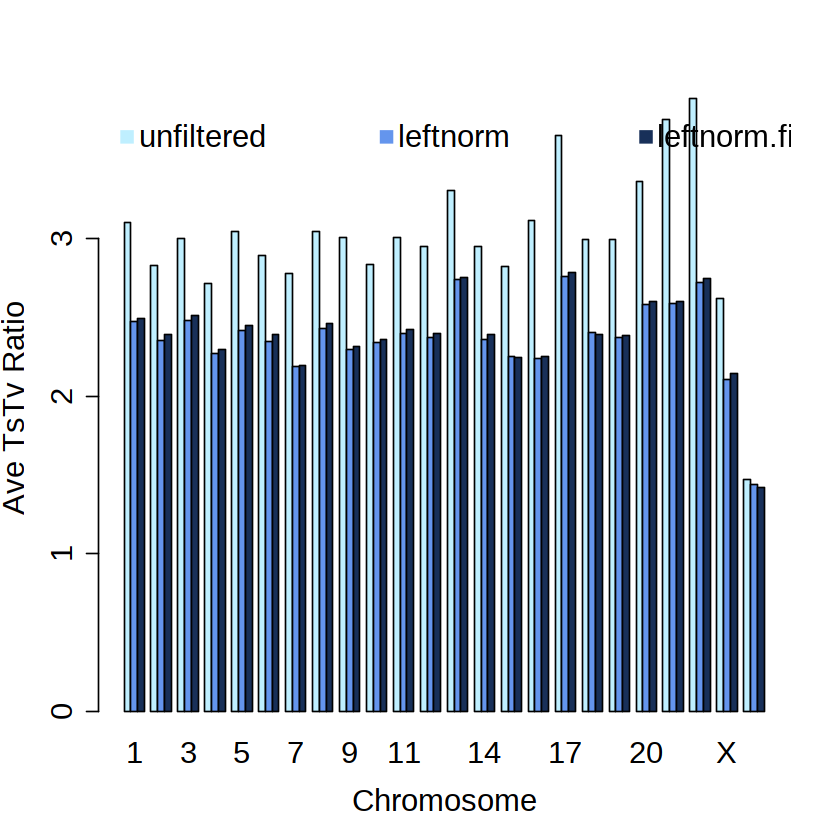

In [12]:
rep=function(data,f){
    tssum<-tvsum<-c()
    for (i in names(table(data$Chr))){
        tssum<-c(tssum,sum(data[(data$Chr==i) & (data$File==f),"TS"]))
        tvsum<-c(tvsum,sum(data[(data$Chr==i) & (data$File==f),"TV"]))
    }
    tstv<-tssum/tvsum
    tstv<-cbind(tstv,chr=names(table(data$Chr)))
    tstv<-as.data.frame(tstv)
    tmp<-tstv[1:22,]
    tmp<-tmp[order(as.numeric(tmp$chr)),]
    tstv[1:22,]<-tmp
    tstv$tstv<-as.numeric(tstv$tstv)
    return(tstv)
}
data1=rep(data,"v1.stats_snpsift")
data2=rep(data,"v1.leftnorm.stats_snpsift")
data3=rep(data,"v1.leftnorm.filtered.stats_snpsift")
barplot(rbind(data1$tstv,data2$tstv,data3$tstv),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue1", "cornflowerblue","#183059"),names.arg=data1$chr)
legend("topleft", c("unfiltered","leftnorm","leftnorm.filtered"), pch=15, col=c("lightblue1", "cornflowerblue","#183059"), bty="n",horiz =TRUE,cex=1.5,x.intersp =0.4)

In [13]:
png("~/working/project_VCF/tstv/ukb23156.leftnorm-filtered-comparison.ave_chromosome.tstv.snpsift.barplot.png",width = 1000, height = 500)
barplot(rbind(data1$tstv,data2$tstv,data3$tstv),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue1", "cornflowerblue","#183059"),names.arg=data1$chr)
legend("topleft", c("unfiltered","leftnorm","leftnorm.filtered"), pch=15, col=c("lightblue1", "cornflowerblue","#183059"), bty="n",horiz =TRUE,cex=1.5,x.intersp =0.4)
dev.off()

png 
  2

In [16]:
data<-read.table("~/working/project_VCF/tstv/ukb23156_bcftools_maf_tstv2.txt")
chrlist<-strsplit(data[,1],"_")
chr<-blo<-file<-c()
for (i in 1:length(chrlist)){
    chr<-cbind(chr,chrlist[[i]][2])
    blo<-cbind(blo,chrlist[[i]][3])
    file<-cbind(file,paste0(chrlist[[i]][4],"_",chrlist[[i]][5]))
}
data2<-as.data.frame(cbind(t(chr),t(blo),t(file)))
colnames(data2)<-c("Chr","Block","File")
data2[,1]<-gsub("c", "", data2[,1])
data<-data[,-1]
data<-cbind(data2,data)

In [17]:
head(data)

,Chr,Block,File,V2,V3,V4,V5
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,10,b0,v1.leftnorm.filtered.stats_bcftools,10007,5071,1703,500
2,10,b0,v1.leftnorm.filtered.stats_bcftools.known,6879,3361,1692,491
3,10,b0,v1.leftnorm.filtered.stats_bcftools.novel,3128,1710,11,9
4,10,b0,v1.leftnorm.stats_bcftools.known,6953,3391,1623,468
5,10,b0,v1.leftnorm.stats_bcftools.maf,10088,5103,1632,477
6,10,b0,v1.leftnorm.stats_bcftools.novel,3135,1712,9,9


In [18]:
data$V6=data$V2+data$V4
data$V7=data$V3+data$V5

In [19]:
table(data$File)


      v1.leftnorm.filtered.stats_bcftools 
                                      977 
v1.leftnorm.filtered.stats_bcftools.known 
                                      952 
v1.leftnorm.filtered.stats_bcftools.novel 
                                      977 
         v1.leftnorm.stats_bcftools.known 
                                      952 
           v1.leftnorm.stats_bcftools.maf 
                                      977 
         v1.leftnorm.stats_bcftools.novel 
                                      977 
                        v1.stats_bcftools 
                                      977 

In [ ]:
f="v1.stats_bcftools"
tssum1<-tvsum1<-tssum2<-tvsum2<-c()
for (i in names(table(data$Chr))){
    tssum1<-c(tssum1,sum(data[(data$Chr==i) & (data$File==f),"V2"]))
    tvsum1<-c(tvsum1,sum(data[(data$Chr==i) & (data$File==f),"V3"]))
    tssum2<-c(tssum2,sum(data[(data$Chr==i) & (data$File==f),"V4"]))
    tvsum2<-c(tvsum2,sum(data[(data$Chr==i) & (data$File==f),"V5"]))    
}
tstv1<-tssum1/tvsum1
tstv2<-tssum2/tvsum2
tstv<-cbind(tstv1,tstv2,chr=names(table(data$Chr)))
tstv<-as.data.frame(tstv)
tmp<-tstv[1:22,]
tmp<-tmp[order(as.numeric(tmp$chr)),]
tstv[1:22,]<-tmp
barplot(rbind(as.numeric(tstv[,1]),as.numeric(tstv[,2])),beside=TRUE,ylab="Ave TsTv Ratio", xlab="Chromosome",cex.lab=1.5,cex.axis=1.5,cex=1.5,col=c("lightblue", "#276FBF"),names.arg=tstv$chr)
legend("topleft", c("0-0.00005","0.00005-"), pch=15, col=c("lightblue", "#276FBF"), bty="n")